# Sesión 2: Técnicas de transformación de datos y evaluación de modelos

## Técnicas de preparación/transformación de datos

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bedu/Datasets_ADD/Remoto amazon_fine_food_reviews-clean.csv')
df.head()

,id,product_id,user_id,profile_name,helpfulness_numerator,helpfulness_denominator,score,time,summary,text
0,258510,B00168V34W,A1672LH9S1XO70,"Lorna J. Loomis ""Canadian Dog Fancier""",13,14,3,1266796800,"Misleading to refer to ""PODS""","This coffee does NOT come in individual ""PODS""..."
1,207915,B000CQID2Y,A42CJC66XO0H7,"Scott Schimmel ""A Butterfly Dreaming""",2,2,5,1279497600,Delicious,I was a little skeptical after looking at the ...
2,522649,B007TJGZ0Y,A16QZBG2UN6Z3X,"Toology ""Toology""",0,0,5,1335830400,One of my favs,Gloia Jeans Butter Toffee is one of my favorit...
3,393368,B000W7PUOW,A3J21CQZG60K35,Hsieh Pei Hsuan,2,2,5,1265673600,Tasty!!,My families and friends love Planters peanuts ...
4,178178,B002FX2IOQ,A1Z7XV6JU0EV8M,"Barbara ""Barbara""",1,6,1,1301788800,"Organic Valley White 1 % Milkfat Lowfat Milk, ...","Organic Valley White 1 % Milkfat Lowfat Milk, ..."


In [ ]:
X = df[['profile_name', "helpfulness_numerator", "helpfulness_denominator", "summary", "text"]]
y = df["score"]

In [ ]:
prop_entrenamiento = 0.6
prop_validacion = 0.1
prop_prueba = 0.3

In [ ]:
val_mas_prueba = prop_validacion + prop_prueba

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=val_mas_prueba)

In [ ]:
prop_prueba_nuevo = prop_prueba / val_mas_prueba

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=prop_prueba_nuevo)

In [ ]:
df.shape

(14211, 10)

In [ ]:
X_train.shape

(8526, 5)

In [ ]:
X_test.shape

(4264, 5)

In [ ]:
X_val.shape

(1421, 5)

### Técnicas de normalización

Estas técnicas nos ayudan a que nuestras variables estén en un rango y escala similar.

> IMPORTANTE!! Si transformé mis datos para entrenar mi modelo, TODOS los datos que después utilice o para volver a entrenarlo o como inputs para realizar predicciones y clasificaciones, tienen que pasar por exactamente el mismo proceso de transformación que utilicé originalmente, utilizando exactamente los valores originales. Obviamente, después de obtener mis resultados, tendría que realizar el proceso inverso exactamente para tener un resultado que esté en la escala original

#### Escalar a un rango

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bedu/Datasets_ADD/Remoto athlete_olympic_events-clean-no_repetition.csv', index_col=0)
df.head()

,age,height,weight,sex
athlete_id,,,,
1,24.000000,180.0,80.0,M
2,23.000000,170.0,60.0,M
5,24.333333,185.0,82.0,F
6,32.000000,188.0,75.0,M
7,32.000000,183.0,72.0,M


In [ ]:
df['weight']

athlete_id
1         80.0
2         60.0
5         82.0
6         75.0
7         72.0
          ... 
135567    72.0
135568    69.0
135569    89.0
135570    59.0
135571    96.0
Name: weight, Length: 99088, dtype: float64

In [ ]:
def escalar_a_01(df):
  df_escalado = (df - df.min()) / (df.max() - df.min())
  return df_escalado

In [ ]:
df_a_escalar = df[["age", "height", "weight"]]

In [ ]:
escalar_a_01(df_a_escalar)

,age,height,weight
athlete_id,,,
1,0.228070,0.535354,0.291005
2,0.210526,0.434343,0.185185
5,0.233918,0.585859,0.301587
6,0.368421,0.616162,0.264550
7,0.368421,0.565657,0.248677
...,...,...,...
135567,0.263158,0.565657,0.248677
135568,0.385965,0.444444,0.232804
135569,0.315789,0.525253,0.338624


#### Clipping

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bedu/Datasets_ADD/Remoto near_earth_objects-jan_feb_1995-clean.csv', index_col=0)
df.head()

,id,name,is_potentially_hazardous_asteroid,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,close_approach_date,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour
0,2154652,154652 (2004 EP20),False,483.676488,1081.533507,1995-01-07,789467580000,Earth,16.142864,58114.308667
1,3153509,(2003 HM),True,96.506147,215.794305,1995-01-07,789491340000,Earth,12.351044,44463.757734
2,3516633,(2010 HA),False,44.111820,98.637028,1995-01-07,789446820000,Earth,6.220435,22393.567277
3,3837644,(2019 AY3),False,46.190746,103.285648,1995-01-07,789513900000,Earth,22.478615,80923.015021
4,3843493,(2019 PY),False,22.108281,49.435619,1995-01-07,789446700000,Earth,4.998691,17995.288355


In [ ]:
import seaborn as sns

<Axes: >

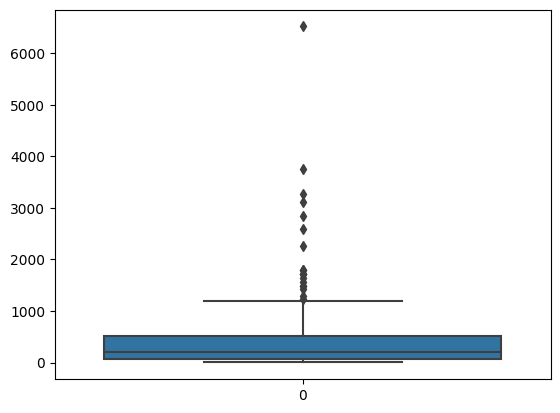

In [ ]:
sns.boxplot(df["estimated_diameter.meters.estimated_diameter_max"])

In [ ]:
import numpy as np

def clip_features(df, iqr_score, clip_top, clip_bottom):
  iqr = df.quantile(0.75) - df.quantile(0.25)
  limite_superior = df.quantile(0.75) + (iqr * iqr_score)
  limite_inferior = df.quantile(0.25) - (iqr * iqr_score)

  new_df = df.copy()

  if (clip_top):
    new_df = np.where(new_df > limite_superior, limite_superior, new_df)
  if (clip_bottom):
    new_df = np.where(new_df < limite_inferior, limite_inferior, new_df)

  return new_df

def escalar_a_01(df):
  df_escalado = (df - df.min()) / (df.max() - df.min())
  return df_escalado

In [ ]:
clipped = clip_features(df["estimated_diameter.meters.estimated_diameter_max"], 1.5, True, True)

<Axes: >

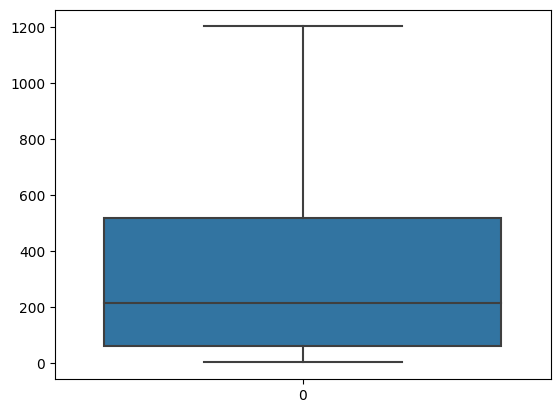

In [ ]:
sns.boxplot(clipped)

<Axes: xlabel='estimated_diameter.meters.estimated_diameter_max', ylabel='Count'>

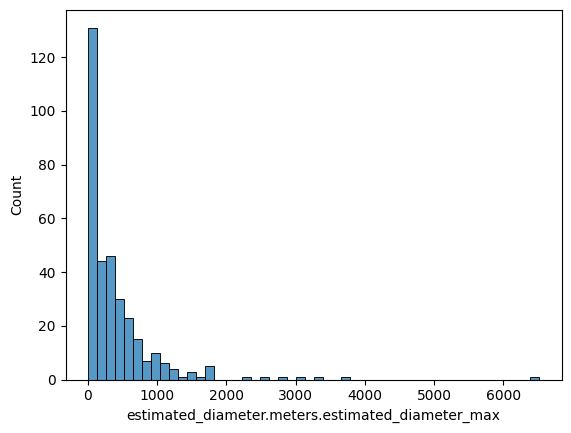

In [ ]:
sns.histplot(df["estimated_diameter.meters.estimated_diameter_max"])

<Axes: ylabel='Count'>

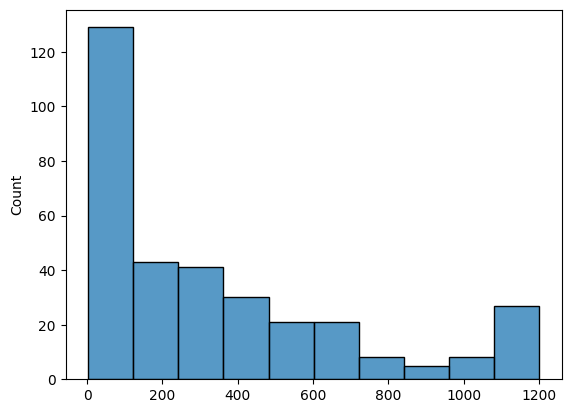

In [ ]:
sns.histplot(clipped)

#### Escalamiento con log

<Axes: xlabel='estimated_diameter.meters.estimated_diameter_max', ylabel='Count'>

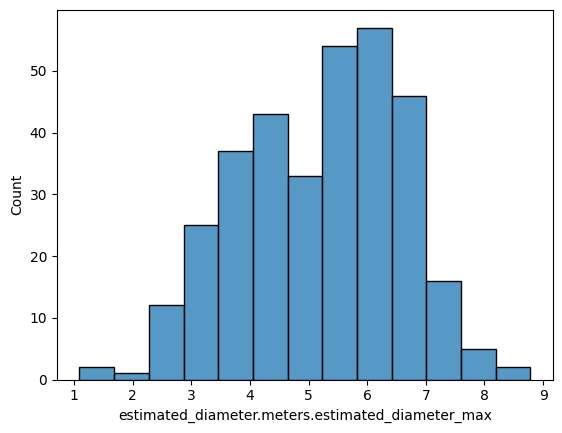

In [ ]:
sns.histplot(np.log(df["estimated_diameter.meters.estimated_diameter_max"]))

In [ ]:
np.log(3500)

8.160518247477505

In [ ]:
np.log(100)

4.605170185988092

In [ ]:
np.log(5)

1.6094379124341003

In [ ]:
np.log(9000000)

16.012735135300492

#### Z-Score

In [ ]:
def z_score(df):
  df_z_score = (df - df.mean()) / df.std()
  return df_z_score

def clip_features(df, iqr_score, clip_top, clip_bottom):
  iqr = df.quantile(0.75) - df.quantile(0.25)
  limite_superior = df.quantile(0.75) + (iqr * iqr_score)
  limite_inferior = df.quantile(0.25) - (iqr * iqr_score)

  new_df = df.copy()

  if (clip_top):
    new_df = np.where(new_df > limite_superior, limite_superior, new_df)
  if (clip_bottom):
    new_df = np.where(new_df < limite_inferior, limite_inferior, new_df)

  return new_df

def escalar_a_01(df):
  df_escalado = (df - df.min()) / (df.max() - df.min())
  return df_escalado

<Axes: xlabel='estimated_diameter.meters.estimated_diameter_max', ylabel='Count'>

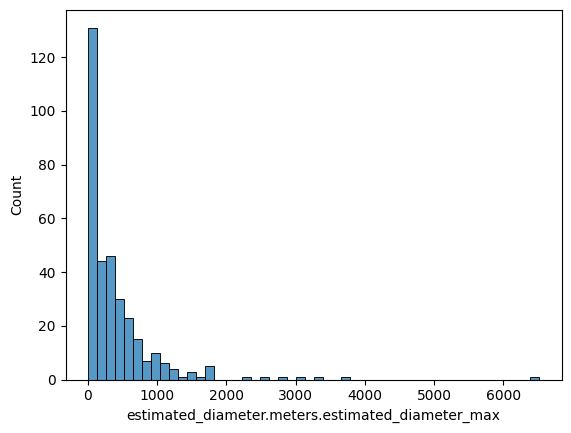

In [ ]:
sns.histplot(df["estimated_diameter.meters.estimated_diameter_max"])

<Axes: xlabel='estimated_diameter.meters.estimated_diameter_max', ylabel='Count'>

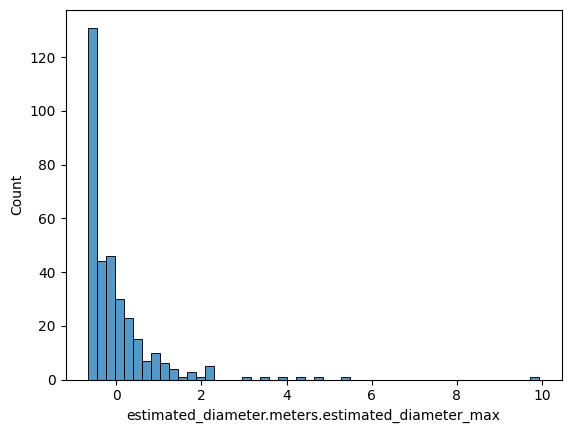

In [ ]:
# Para esta variable, esta transformación no resulta tan útil, porque la distribución de datos original es una distribución de ley de potencia

sns.histplot(z_score(df["estimated_diameter.meters.estimated_diameter_max"]))

### One-Hot Encoding

In [ ]:
df.head()

,age,height,weight,sex
athlete_id,,,,
1,24.000000,180.0,80.0,M
2,23.000000,170.0,60.0,M
5,24.333333,185.0,82.0,F
6,32.000000,188.0,75.0,M
7,32.000000,183.0,72.0,M


In [ ]:
df['sex'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
dummies = pd.get_dummies(df.sex, prefix='sex')
dummies

,sex_F,sex_M
athlete_id,,
1,0,1
2,0,1
5,1,0
6,0,1
7,0,1
...,...,...
135567,0,1
135568,1,0
135569,0,1


In [ ]:
pd.concat([df, dummies], axis=1).drop(columns=["sex"])

,age,height,weight,sex_F,sex_M
athlete_id,,,,,
1,24.000000,180.0,80.0,0,1
2,23.000000,170.0,60.0,0,1
5,24.333333,185.0,82.0,1,0
6,32.000000,188.0,75.0,0,1
7,32.000000,183.0,72.0,0,1
...,...,...,...,...,...
135567,26.000000,183.0,72.0,0,1
135568,33.000000,171.0,69.0,1,0
135569,29.000000,179.0,89.0,0,1


### Validación Cruzada

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [ ]:
K = 4

In [ ]:
k_fold = KFold(n_splits=K, shuffle=True)

In [ ]:
for indices_train, indices_test in k_fold.split(data):
  print(f"Entrenamiento: {data[indices_train]}")
  print(f"Prueba: {data[indices_test]}")
  print(f"\n")

Entrenamiento: [ 1  2  3  5  6  7  8  9 10 11 12 14 15 16 18]
Prueba: [ 4 13 17 19 20]


Entrenamiento: [ 3  4  5  7  9 10 11 12 13 14 15 17 18 19 20]
Prueba: [ 1  2  6  8 16]


Entrenamiento: [ 1  2  3  4  5  6  7  8  9 10 13 16 17 19 20]
Prueba: [11 12 14 15 18]


Entrenamiento: [ 1  2  4  6  8 11 12 13 14 15 16 17 18 19 20]
Prueba: [ 3  5  7  9 10]




### Matriz de confusión

In [ ]:
y_test = np.array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0])
y_predict = np.array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix = confusion_matrix(y_test, y_predict)
matrix

array([[11,  2],
       [ 3,  9]])

In [ ]:
(TN, FP, FN, TP) = matrix.ravel()

In [ ]:
def get_accuracy(TN, FP, FN, TP):
  accuracy = (TP + TN) / (TP + FP + FN + TN)
  accuracy *= 100
  return accuracy

In [ ]:
def get_sensibility(FN, TP):
  sensibility = TP / (TP + FN)
  sensibility *= 100
  return sensibility

In [ ]:
def get_specificity(TN, FP):
  specificity = TN / (TN + FP)
  specificity *= 100
  return specificity

# Sesión 3: Clasificación No Supervisada

## K-Means

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd

In [ ]:
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=3)

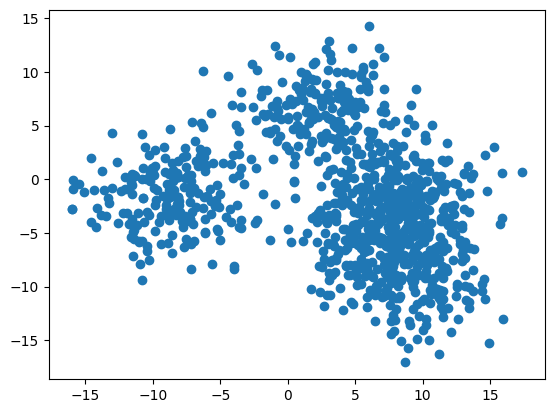

In [ ]:
plt.scatter(X[:, 0], X[:, 1]);

In [ ]:
KMeans?

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=4, n_init=10)

In [ ]:
centers = kmeans.cluster_centers_

In [ ]:
centers

array([[ 7.93389184, -1.58122181],
       [ 8.27161316, -8.54235084],
       [-8.50593842, -1.69163849],
       [ 2.38958072,  6.69516395]])

In [ ]:
y_pred = kmeans.predict(X)

In [ ]:
y_pred

array([3, 2, 2, 0, 2, 3, 1, 3, 2, 3, 0, 1, 1, 0, 1, 1, 0, 1, 2, 3, 0, 0,
       0, 0, 0, 1, 1, 2, 0, 2, 3, 1, 0, 2, 0, 0, 2, 1, 0, 3, 0, 0, 3, 0,
       0, 0, 0, 0, 2, 0, 2, 1, 1, 2, 3, 1, 1, 0, 0, 3, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 2, 2, 0, 3, 3, 0, 2, 0, 1, 1, 3, 0, 1, 3, 1, 3,
       1, 1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 3, 3, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 0, 2, 2, 1, 1, 0, 1, 0, 3, 1,
       3, 3, 0, 2, 0, 2, 1, 0, 0, 3, 0, 0, 1, 2, 3, 3, 1, 1, 0, 1, 2, 3,
       0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0,
       3, 0, 2, 3, 1, 0, 3, 0, 2, 1, 2, 3, 3, 1, 3, 0, 2, 3, 2, 3, 0, 0,
       0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 3, 1, 2, 3, 1, 1, 0, 0, 2, 0,
       0, 1, 1, 1, 0, 3, 0, 0, 0, 1, 3, 3, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1,
       1, 3, 0, 1, 1, 1, 2, 1, 1, 1, 3, 2, 0, 3, 2, 1, 0, 2, 3, 3, 1, 0,
       1, 0, 1, 2, 0, 2, 1, 2, 0, 0, 3, 2, 2, 3, 1, 0, 1, 0, 1, 2, 2, 2,
       0, 3, 3, 1, 2, 0, 3, 2, 2, 2, 3, 0, 2, 2, 0,

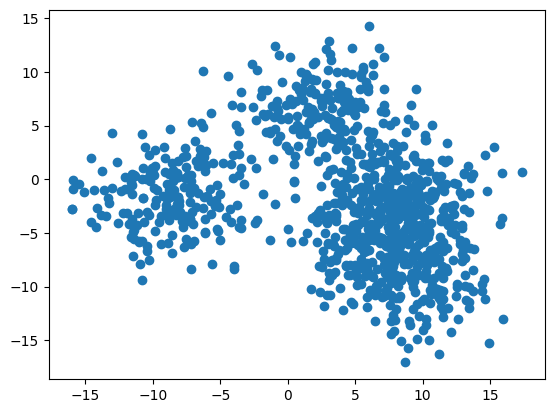

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
#plt.scatter(centers[:, 0], centers[:, 1], c='r')

In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1
0,-8.905756,-5.204799
1,4.051076,6.732691
2,2.101778,-7.102461
3,4.897433,7.912632
4,-8.140152,-9.725155


In [ ]:
df['class'] = y_pred

In [ ]:
df

,0,1,class
0,-8.905756,-5.204799,0
1,4.051076,6.732691,1
2,2.101778,-7.102461,3
3,4.897433,7.912632,1
4,-8.140152,-9.725155,0
...,...,...,...
995,6.337367,5.852537,1
996,1.222712,6.756649,1
997,9.134160,7.882441,1
998,-13.266418,-9.407500,0


In [ ]:
df_mall = pd.read_csv('/content/Mall_Customers.csv', index_col=0)
df_mall

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [ ]:
pd.factorize(df_mall["Gender"])

(array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 0]),
 Index(['Male', 'Female'], dtype='object'))

In [ ]:
df_mall = df_mall.drop(columns="Gender")
df_mall

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40
...,...,...,...
196,35,120,79
197,45,126,28
198,32,126,74


In [ ]:
kmeans2 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)

In [ ]:
kmeans2.fit(df_mall)

KMeans(n_clusters=4, n_init=10)

In [ ]:
y_pred = kmeans2.predict(df_mall)

In [ ]:
df_mall["group"] = y_pred

In [ ]:
df_mall

,Age,Annual Income (k$),Spending Score (1-100),group
CustomerID,,,,
1,19,15,39,0
2,21,15,81,0
3,20,16,6,3
4,23,16,77,0
5,31,17,40,3
...,...,...,...,...
196,35,120,79,1
197,45,126,28,2
198,32,126,74,1


## Analizando nuestros grupos con gráficas de densidad

In [ ]:
import seaborn as sns

In [ ]:
df.head()

,0,1,class
0,-8.905756,-5.204799,0
1,4.051076,6.732691,1
2,2.101778,-7.102461,3
3,4.897433,7.912632,1
4,-8.140152,-9.725155,0


In [ ]:
# éstas son columnas inventadas!!!!!!

df.columns = ['age', 'income', 'class']

In [ ]:
df['class'].unique()

array([0, 1, 3, 2], dtype=int32)

In [ ]:
group_0 = df[df['class'] == 0]
group_1 = df[df['class'] == 1]
group_2 = df[df['class'] == 2]
group_3 = df[df['class'] == 3]

In [ ]:
df.head()

,age,income,class
0,-8.905756,-5.204799,0
1,4.051076,6.732691,1
2,2.101778,-7.102461,3
3,4.897433,7.912632,1
4,-8.140152,-9.725155,0


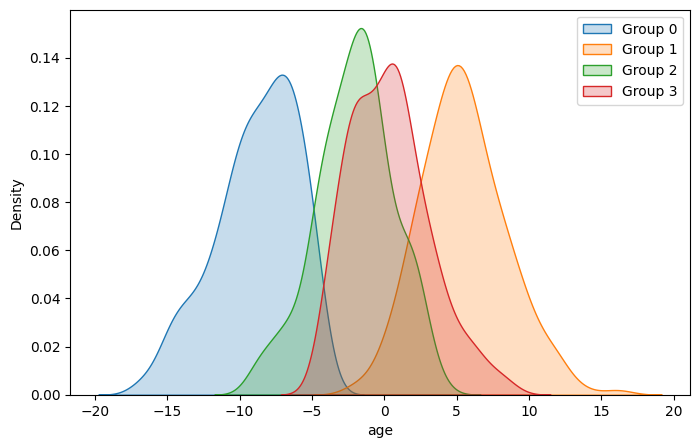

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

sns.kdeplot(data=group_0, x='age', ax=ax, label='Group 0', fill=True)
sns.kdeplot(data=group_1, x='age', ax=ax, label='Group 1', fill=True)
sns.kdeplot(data=group_2, x='age', ax=ax, label='Group 2', fill=True)
sns.kdeplot(data=group_3, x='age', ax=ax, label='Group 3', fill=True)

ax.legend();

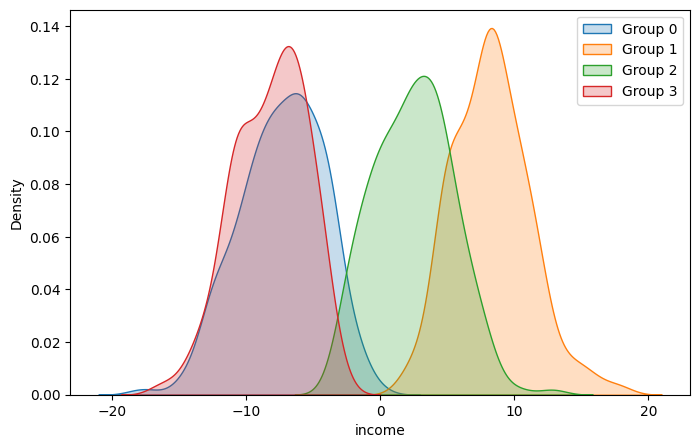

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

sns.kdeplot(data=group_0, x='income', ax=ax, label='Group 0', fill=True)
sns.kdeplot(data=group_1, x='income', ax=ax, label='Group 1', fill=True)
sns.kdeplot(data=group_2, x='income', ax=ax, label='Group 2', fill=True)
sns.kdeplot(data=group_3, x='income', ax=ax, label='Group 3', fill=True)

ax.legend();

In [ ]:
df_mall.head()

,Age,Annual Income (k$),Spending Score (1-100),group
CustomerID,,,,
1,19,15,39,0
2,21,15,81,0
3,20,16,6,3
4,23,16,77,0
5,31,17,40,3


In [ ]:
df_mall['group'].unique()

array([0, 3, 1, 2], dtype=int32)

In [ ]:
# Recuerden que los grupos ya los tenemos!!!

mall_group_0 = df_mall[df_mall['group'] == 0]
mall_group_1 = df_mall[df_mall['group'] == 1]
mall_group_2 = df_mall[df_mall['group'] == 2]
mall_group_3 = df_mall[df_mall['group'] == 3]

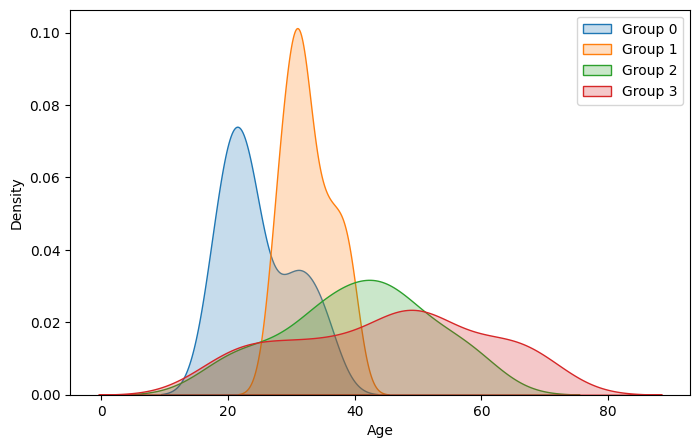

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

sns.kdeplot(data=mall_group_0, x='Age', ax=ax, label='Group 0', fill=True)
sns.kdeplot(data=mall_group_1, x='Age', ax=ax, label='Group 1', fill=True)
sns.kdeplot(data=mall_group_2, x='Age', ax=ax, label='Group 2', fill=True)
sns.kdeplot(data=mall_group_3, x='Age', ax=ax, label='Group 3', fill=True)

ax.legend();

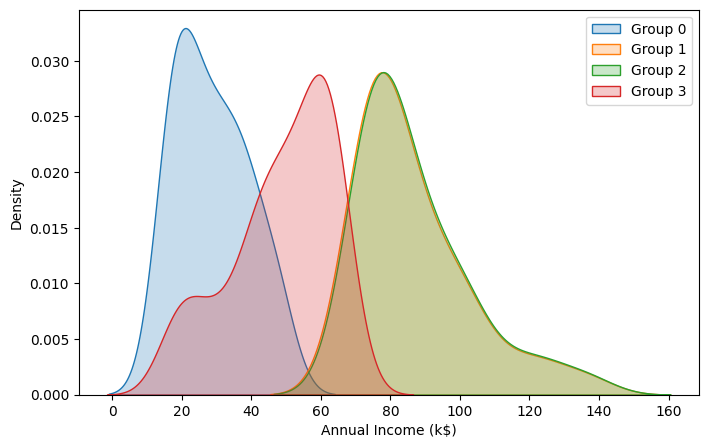

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

sns.kdeplot(data=mall_group_0, x='Annual Income (k$)', ax=ax, label='Group 0', fill=True)
sns.kdeplot(data=mall_group_1, x='Annual Income (k$)', ax=ax, label='Group 1', fill=True)
sns.kdeplot(data=mall_group_2, x='Annual Income (k$)', ax=ax, label='Group 2', fill=True)
sns.kdeplot(data=mall_group_3, x='Annual Income (k$)', ax=ax, label='Group 3', fill=True)

ax.legend();

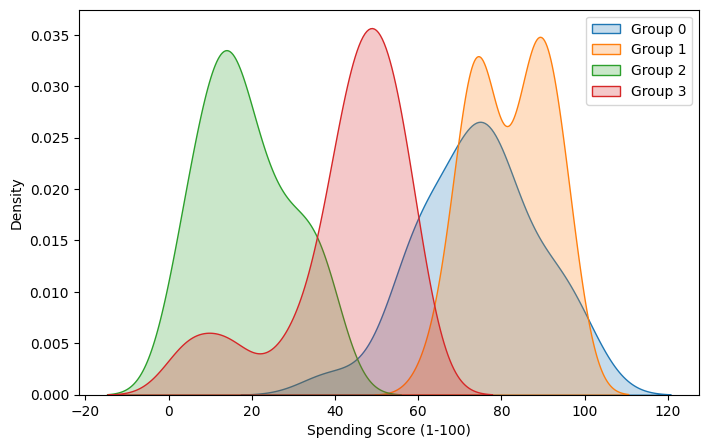

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

sns.kdeplot(data=mall_group_0, x='Spending Score (1-100)', ax=ax, label='Group 0', fill=True)
sns.kdeplot(data=mall_group_1, x='Spending Score (1-100)', ax=ax, label='Group 1', fill=True)
sns.kdeplot(data=mall_group_2, x='Spending Score (1-100)', ax=ax, label='Group 2', fill=True)
sns.kdeplot(data=mall_group_3, x='Spending Score (1-100)', ax=ax, label='Group 3', fill=True)

ax.legend();

## Método de Codo

In [ ]:
# Inercia es la suma de la distancia de cada una de las muestras al centroide que le fue asignado

inertia = []
for n in range(1, 11):
  model = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300)
  model.fit(X)
  inertia.append(model.inertia_)

Text(0, 0.5, 'Inertia')

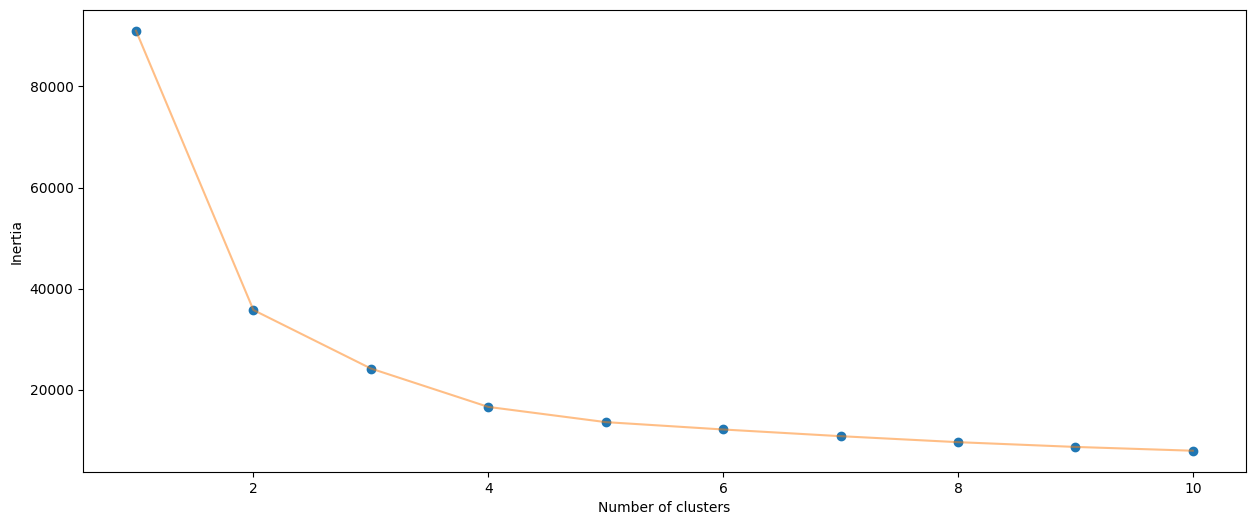

In [ ]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

# Sesión 4: Regresión Lineal

In [2]:
import pandas as pd

In [1]:
#Dataset filename
#filename='airbnb_clean_F2M4_Postwork7.csv'
filename='Dataset_conCentros.csv'

In [3]:
#Ruta al repo del archivo Github de Procesamiento de Datos con Python

Github_path = 'https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_ML/main/Datasets/'
#Github_path_image = 'https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_ML/main/images/'

file_path=Github_path+filename
#file_path_image=Github_path_image+imagename

print('Usando GithubPath: '+file_path)
#print('Usando GithubPath image: '+file_path_image)

Usando GithubPath: https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_ML/main/Datasets/Dataset_conCentros.csv


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bedu/Datasets_ADD/Remoto melbourne_housing-clean.csv', index_col=0)
df.head()



In [ ]:
data=pd.read_csv(file_path)
data.head()

In [ ]:
df['suburb'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [ ]:
df['type'].unique()

array(['h', 'u', 't'], dtype=object)

In [ ]:
df['council_area'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', 'Knox', 'Maroondah',
       'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik', 'Whittlesea',
       'Frankston', 'Macedon Ranges', 'Yarra Ranges', 'Wyndham',
       'Cardinia', 'Moorabool', 'Mitchell'], dtype=object)

In [ ]:
X = df.drop(columns=["address", "price", "method", "seller_g", "date", "suburb", "postcode", "type", "council_area", "region_name"])
y = df["price"]

In [6]:
X = data.drop(columns=['price','city', 'neighbourhood', 'property_type', 'room_type', 'zipcode', 'amenities','bed_type', 'cleaning_fee', 'cancellation_policy', 'instant_bookable', 'description', 'name', 'host_has_profile_pic', 'host_identity_verified',])

y = data["price"]

In [10]:
X = data.drop(columns=["price","amenities","bed_type","description","host_has_profile_pic","host_identity_verified","instant_bookable","name",
                     "neighbourhood","zipcode","n_days_lastrev","n_days_ashost"])

In [11]:
X

,property_type,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,distanciaCentro
0,House,2,2,0.0,3,1,NYC,100.0,40.650360,-74.003574,15,89,1.0,1.0,10.621672
1,Apartment,3,2,1.0,3,1,LA,0.0,33.987589,-118.474525,12,98,1.0,1.0,22.456674
2,Apartment,3,4,1.0,3,1,NYC,80.0,40.602618,-73.993318,26,94,0.0,2.0,15.051423
3,Townhouse,2,3,1.0,3,1,LA,100.0,34.072653,-118.096453,33,95,1.0,2.0,13.751080
4,Condominium,3,5,2.0,3,1,Chicago,100.0,41.781916,-87.606271,60,88,2.0,2.0,11.198063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59283,House,3,5,2.0,2,1,LA,100.0,34.198832,-118.501966,5,88,3.0,3.0,28.826098
59284,Condominium,3,2,1.5,3,1,NYC,100.0,40.807678,-73.952439,11,100,1.0,1.0,8.691043
59285,Apartment,3,3,1.0,2,1,LA,33.0,34.030466,-118.444475,0,0,1.0,2.0,18.658614
59286,Apartment,3,3,1.0,3,1,NYC,86.0,40.700510,-73.939087,11,100,1.0,1.0,3.362620


In [ ]:
df_2train = data.drop(columns=['city', 'neighbourhood', 'property_type', 'room_type', 'zipcode', 'amenities','bed_type', 'cleaning_fee', 'cancellation_policy', 'instant_bookable', 'description', 'name', 'host_has_profile_pic', 'host_identity_verified',])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'House'

In [ ]:
y_predict = lr.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_predict)

214631079051.25552

In [ ]:
lr.score(X_test, y_test)

0.45633498786119553

In [ ]:
np.sum(cross_val_score(lr, X, y)) / 5

0.39047119100114597

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(df["type"])

LabelEncoder()

In [ ]:
le.classes_

array(['h', 't', 'u'], dtype=object)

In [ ]:
le.transform(df["type"])

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
X["type"] = le.transform(df["type"])

In [ ]:
X["type"].dtypes

dtype('int64')

In [ ]:
le.fit(df["council_area"])

LabelEncoder()

In [ ]:
X["council_area"] = le.transform(df["council_area"])

In [ ]:
le.fit(df["region_name"])
X["region_name"] = le.transform(df["region_name"])

In [ ]:
X.head()

,rooms,distance,bedroom_2,bathroom,car,land_size,latitude,longitude,property_count,type,council_area,region_name
0,2,2.5,2.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0,0,31,2
1,2,2.5,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0,0,31,2
2,3,2.5,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0,0,31,2
3,3,2.5,3.0,2.0,1.0,94.0,-37.7969,144.9969,4019.0,0,31,2
4,4,2.5,3.0,1.0,2.0,120.0,-37.8072,144.9941,4019.0,0,31,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict2 = lr2.predict(X_test)

In [ ]:
lr2.score(X_test, y_test)

0.5248805512268285

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
np.sum(cross_val_score(lr2, X, y)) / 5

0.44265240767904784

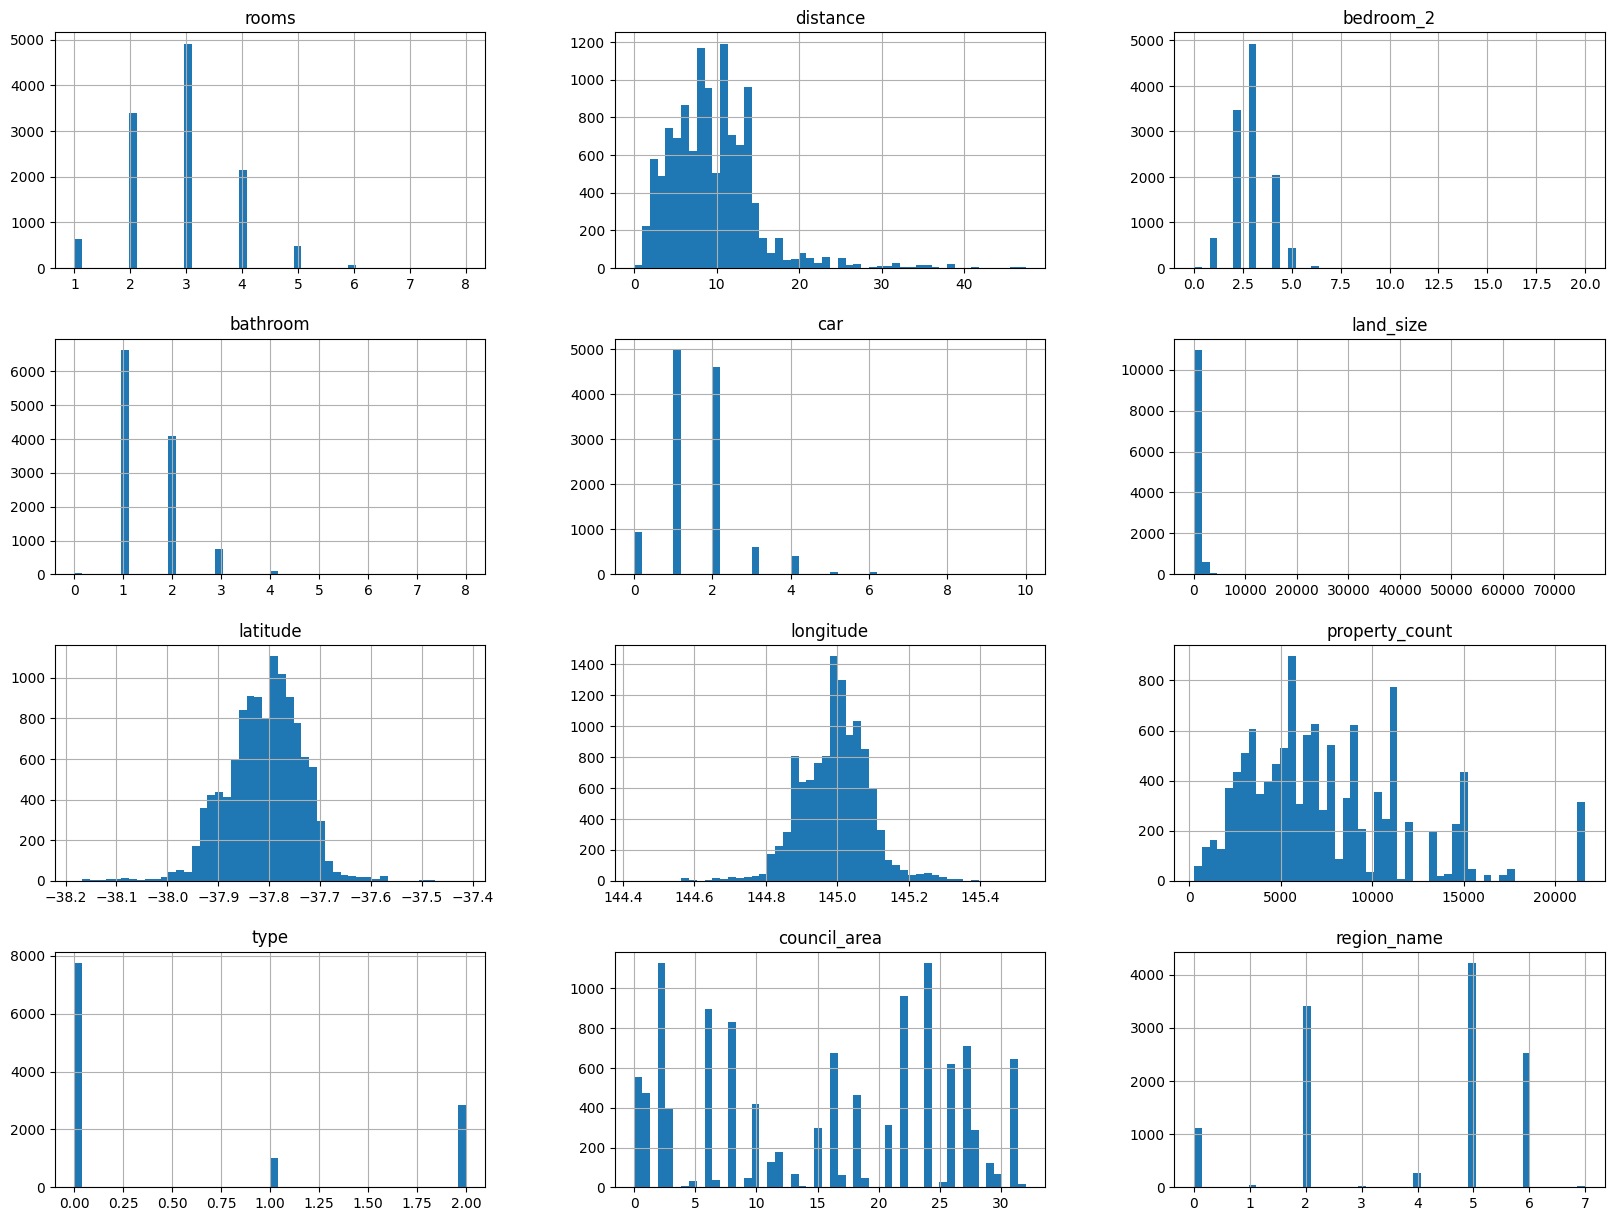

In [ ]:
X.hist(bins=50, figsize=(20, 15));

In [ ]:
def z_score(df):
  df_z_score = (df - df.mean()) / df.std()
  return df_z_score

def clip_features(df, iqr_score, clip_top, clip_bottom):
  iqr = df.quantile(0.75) - df.quantile(0.25)
  limite_superior = df.quantile(0.75) + (iqr * iqr_score)
  limite_inferior = df.quantile(0.25) - (iqr * iqr_score)

  new_df = df.copy()

  if (clip_top):
    new_df = np.where(new_df > limite_superior, limite_superior, new_df)
  if (clip_bottom):
    new_df = np.where(new_df < limite_inferior, limite_inferior, new_df)

  return new_df

def escalar_a_01(df):
  df_escalado = (df - df.min()) / (df.max() - df.min())
  return df_escalado

def log(df):
  return np.log(df)

In [ ]:
X["distance"] = z_score(X["distance"])

In [ ]:
X["land_size"] = clip_features(X["land_size"], 4, True, False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr3 = LinearRegression()
lr3.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict3 = lr3.predict(X_test)
lr3.score(X_test, y_test)

0.558284637386395

In [ ]:
np.sum(cross_val_score(lr3, X, y)) / 5

0.440920289765337

In [ ]:
X_scaled = escalar_a_01(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
lr4 = LinearRegression()
lr4.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict4 = lr4.predict(X_test)
lr4.score(X_test, y_test)

0.5436930400402323

In [ ]:
np.sum(cross_val_score(lr4, X, y)) / 5

0.440920289765337

In [ ]:
y_predict4

array([1271716.35260216,  929282.74306546,  665555.66039038, ...,
       1018712.26900683,  977683.0125269 ,  872149.52633781])

In [ ]:
from joblib import dump, load

In [ ]:
dump(lr4, 'model4_melbourne_prices.joblib')

['model4_melbourne_prices.joblib']

In [ ]:
lr4 = load('model4_melbourne_prices.joblib')

In [ ]:
lr4.predict(X_test)

array([1271716.35260216,  929282.74306546,  665555.66039038, ...,
       1018712.26900683,  977683.0125269 ,  872149.52633781])

## Regresión Polinomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X.head()

,rooms,distance,bedroom_2,bathroom,car,land_size,latitude,longitude,property_count,type,council_area,region_name
0,2,2.5,2.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0,0,31,2
1,2,2.5,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0,0,31,2
2,3,2.5,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0,0,31,2
3,3,2.5,3.0,2.0,1.0,94.0,-37.7969,144.9969,4019.0,0,31,2
4,4,2.5,3.0,1.0,2.0,120.0,-37.8072,144.9941,4019.0,0,31,2


In [ ]:
lr_1 = LinearRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
lr_1 = LinearRegression()
lr_1.fit(X_train, y_train)
print(f"R2 Train: {lr_1.score(X_train, y_train)}")
print(f"R2 Test: {lr_1.score(X_test, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_1, X_train, y_train)) / 5}")

R2 Train: 0.5239046011943925
R2 Test: 0.5424830321851044
Cross Val: 0.521474473320265


In [ ]:
poly_2 = PolynomialFeatures(degree=2)
X_train_2 = poly_2.fit_transform(X_train)
X_test_2 = poly_2.fit_transform(X_test)

lr_2 = LinearRegression()
lr_2.fit(X_train_2, y_train)
print(f"R2 Train: {lr_2.score(X_train_2, y_train)}")
print(f"R2 Test: {lr_2.score(X_test_2, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_2, X_train_2, y_train)) / 5}")

R2 Train: 0.6466153273686479
R2 Test: 0.6535337446008405
Cross Val: 0.6199744226810301


In [ ]:
poly_3 = PolynomialFeatures(degree=3)
X_train_3 = poly_3.fit_transform(X_train)
X_test_3 = poly_3.fit_transform(X_test)

lr_3 = LinearRegression()
lr_3.fit(X_train_3, y_train)
print(f"R2 Train: {lr_3.score(X_train_3, y_train)}")
print(f"R2 Test: {lr_3.score(X_test_3, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_3, X_train_3, y_train)) / 5}")

R2 Train: 0.7419429163249663
R2 Test: 0.6559973480185664
Cross Val: -0.3890645977622262


In [ ]:
poly_4 = PolynomialFeatures(degree=4)
X_train_4 = poly_4.fit_transform(X_train)
X_test_4 = poly_4.fit_transform(X_test)

lr_4 = LinearRegression()
lr_4.fit(X_train_4, y_train)
print(f"R2 Train: {lr_4.score(X_train_4, y_train)}")
print(f"R2 Test: {lr_4.score(X_test_4, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_4, X_train_4, y_train)) / 5}")

R2 Train: 0.7934497454741088
R2 Test: 0.414860888186409
Cross Val: -1.0824439743475467


In [ ]:
poly_5 = PolynomialFeatures(degree=5)
X_train_5 = poly_5.fit_transform(X_train)
X_test_5 = poly_5.fit_transform(X_test)

lr_5 = LinearRegression()
lr_5.fit(X_train_5, y_train)
print(f"R2 Train: {lr_5.score(X_train_5, y_train)}")
print(f"R2 Test: {lr_5.score(X_test_5, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_5, X_train_5, y_train)) / 5}")

R2 Train: 0.8161801373273605
R2 Test: -1.9309386833733417
Cross Val: -5.649803424382805


 # Sesión 5

In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#  Generar dataset falso utilizando make_blobs: 2 categorías, 6 variables

X, y = make_blobs(n_samples=1000, centers=2, n_features=6, cluster_std=3)

In [ ]:
X

array([[ -9.61121337,   2.61930788,   6.37290035,  -4.76090777,
        -10.70137426,   8.86736138],
       [ -8.3394027 ,   4.17927057,  -5.13454589,  -4.04157216,
         -9.51838094,   6.41321472],
       [ -6.90432146,   9.22652206,  -4.49190046,  -2.33873352,
        -10.54253043,  12.3049704 ],
       ...,
       [ -6.93954909,  10.31541405,  -1.09300081,  -1.78227626,
         -9.22354658,   0.91869501],
       [ -7.23865435,  -7.32223382,   7.11132318,   2.5915984 ,
         -2.25772375,   1.54199407],
       [ -4.35171298,  -9.85549522,   7.3670383 ,   2.82580742,
          2.16023042,  -2.23584648]])

In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5
0,-9.611213,2.619308,6.372900,-4.760908,-10.701374,8.867361
1,-8.339403,4.179271,-5.134546,-4.041572,-9.518381,6.413215
2,-6.904321,9.226522,-4.491900,-2.338734,-10.542530,12.304970
3,-5.316308,6.200485,-1.432845,-2.657920,-9.020729,7.924987
4,-4.402750,-3.153799,4.216962,2.010450,-2.472787,1.948959


In [ ]:
y

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,

In [ ]:
df[0].min()

-14.837579141922127

In [ ]:
df[0].max()

2.497739108195649

In [ ]:
pd.cut(df[0], 4, labels=["low", "mid", "high", "very high"])

0       mid
1       mid
2       mid
3      high
4      high
       ... 
995     low
996     low
997     mid
998     mid
999    high
Name: 0, Length: 1000, dtype: category
Categories (4, object): ['low' < 'mid' < 'high' < 'very high']

In [ ]:
# Convertir una variable numérica a categórica segmentándola por bins

df[0] = pd.cut(df[0], 4, labels=["low", "mid", "high", "very high"])

In [ ]:
df.head()

,0,1,2,3,4,5
0,mid,2.619308,6.372900,-4.760908,-10.701374,8.867361
1,mid,4.179271,-5.134546,-4.041572,-9.518381,6.413215
2,mid,9.226522,-4.491900,-2.338734,-10.542530,12.304970
3,high,6.200485,-1.432845,-2.657920,-9.020729,7.924987
4,high,-3.153799,4.216962,2.010450,-2.472787,1.948959


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
# Convertir variable categórica representada por strings a variable categórica representada por números discretos

df[0] = le.fit_transform(df[0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier()

In [ ]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = tree_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
def calcular_precision(TP, TN, FP, FN):
    precision = (TP + TN) / (TP + TN + FP + FN)
    precision = precision * 100
    return precision

def calcular_sensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcular_especificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

In [ ]:
(TN, FP, FN, TP) = matrix.ravel()

In [ ]:
calcular_precision(TP, TN, FP, FN)

100.0

In [ ]:
calcular_sensibilidad(TP, TN, FP, FN)

100.0

In [ ]:
calcular_especificidad(TP, TN, FP, FN)

100.0

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

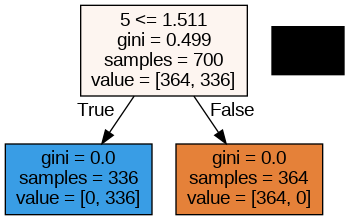

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=df.columns, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
df = pd.read_csv('/content/IBM_HR_Employee_Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 1. Construir el y con la variable Attrition
# 2. Sacar la variable dependiente de X
# 3. Convertir Attrition en una variable numérica binaria
# 4. Convertir todas las variables categóricas en variables numéricas utilzando el LabelEncoder
# 5. Dejar fuera de X las variables que ustedes crean que no tienen ningún impacto sobre la clasificación

In [ ]:
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis="columns", inplace=True)

In [ ]:
categorical_col = []
for column in df.columns:
  if df[column].dtype == object and len(df[column].unique()) < 50:
    categorical_col.append(column)

In [ ]:
categorical_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [ ]:
df["Attrition"] = df.Attrition.astype("category").cat.codes

In [ ]:
categorical_col.remove("Attrition")

In [ ]:
le = LabelEncoder()
for column in categorical_col:
  df[column] = le.fit_transform(df[column])

In [ ]:
X = df.drop("Attrition", axis=1)
y = df.Attrition

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = tree_clf.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
(TN, FP, FN, TP) = matrix.ravel()

In [ ]:
calcular_precision(TP, TN, FP, FN)

76.41723356009071

In [ ]:
calcular_sensibilidad(TP, TN, FP, FN)

40.0

In [ ]:
calcular_especificidad(TP, TN, FP, FN)

82.7127659574468

In [ ]:
df.shape

(1470, 31)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_clf.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
(TN, FP, FN, TP) = matrix.ravel()

In [ ]:
calcular_precision(TP, TN, FP, FN)

99.66666666666667

In [ ]:
calcular_sensibilidad(TP, TN, FP, FN)

100.0

In [ ]:
calcular_especificidad(TP, TN, FP, FN)

99.39024390243902

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators = [100, 500]
max_features = ['auto', 'log2']
max_depth = [3, 5]
min_samples_split = [5, 10]
min_samples_leaf = [1, 4]
bootstrap = [True]

In [ ]:
params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [ ]:
grid_search_cv = GridSearchCV(rf_clf, params_grid, scoring='f1', cv=3, verbose=1, n_jobs=3)

In [ ]:
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'bootstrap': [True], 'max_depth': [3, 5],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 500]},
             scoring='f1', verbose=1)

In [ ]:
best_params = grid_search_cv.best_params_

In [ ]:
best_params

{'bootstrap': True,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
rf_clf_optimized = RandomForestClassifier(**best_params)

# Sesión 6

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X_celsius = np.array([-40, -35, -20, -14, -25, -11, -6, -4, -7, -78, -23, -14, 24, 35, 47, 69, 47, 12, 24, 26, 50, 78, -55, -46, -78, -25, 25, 36, 85, 63, 24])
y_farenheit = X_celsius * 1.8 + 32

In [ ]:
y_farenheit

array([ -40. ,  -31. ,   -4. ,    6.8,  -13. ,   12.2,   21.2,   24.8,
         19.4, -108.4,   -9.4,    6.8,   75.2,   95. ,  116.6,  156.2,
        116.6,   53.6,   75.2,   78.8,  122. ,  172.4,  -67. ,  -50.8,
       -108.4,  -13. ,   77. ,   96.8,  185. ,  145.4,   75.2])

In [ ]:
# 1. Crear nuestras capas. Cada capa está conformada por un número de neuronas que nosotros elegimos
# l es de "layer"
# Dense = Deeply-Interconnected Layers (capas que están totalmente interconectadas entre ellas)
# units = número de neuronas de la capa
# input_shape = la forma de cada x

l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [ ]:
# 2. Conectar las capas para construir la red neuronal
# Sequential recibe un arreglo de capas

model2 = tf.keras.Sequential([l0])

In [ ]:
# loss = función de error que vamos a intentar minimizar
# optimizer = algoritmo de aprendizaje
# learning_rate = el tamaño de los saltos que realizamos a la hora de querer minimizar nuestro error

model2.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))

In [ ]:
history = model2.fit(X_celsius, y_farenheit, epochs=1000, verbose=True, validation_split=0.1)

Epoch 1/1000
1/1 [==============================] - 0s 498ms/step - loss: 7738.5435 - val_loss: 19908.1465
Epoch 2/1000
1/1 [==============================] - 0s 33ms/step - loss: 7083.7793 - val_loss: 18312.0391
Epoch 3/1000
1/1 [==============================] - 0s 32ms/step - loss: 6462.9287 - val_loss: 16787.3516
Epoch 4/1000
1/1 [==============================] - 0s 33ms/step - loss: 5876.5166 - val_loss: 15335.3984
Epoch 5/1000
1/1 [==============================] - 0s 33ms/step - loss: 5324.9746 - val_loss: 13957.2539
Epoch 6/1000
1/1 [==============================] - 0s 33ms/step - loss: 4808.6030 - val_loss: 12653.7676
Epoch 7/1000
1/1 [==============================] - 0s 55ms/step - loss: 4327.5728 - val_loss: 11425.5430
Epoch 8/1000
1/1 [==============================] - 0s 35ms/step - loss: 3881.9128 - val_loss: 10272.8867
Epoch 9/1000
1/1 [==============================] - 0s 42ms/step - loss: 3471.4890 - val_loss: 9195.8008
Epoch 10/1000
1/1 [===========================

In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

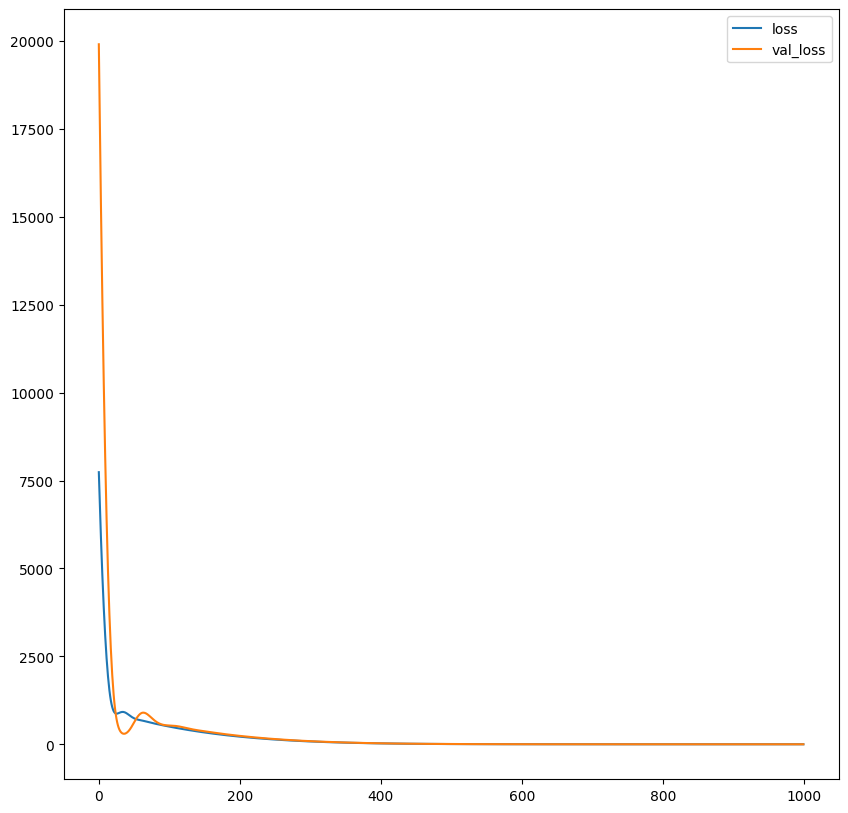

In [ ]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_pred = model2.predict(X_celsius)

1/1 [==============================] - 0s 46ms/step


In [ ]:
r2_score(y_farenheit, y_pred)

0.9999999360988697

In [ ]:
l0.get_weights()

[array([[1.7999805]], dtype=float32), array([31.98066], dtype=float32)]

In [ ]:
df = pd.read_csv('/content/boston_house_prices.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
def escalar_a_01(df):
  df_escalado = (df - df.min()) / (df.max() - df.min())
  return df_escalado

In [ ]:
df = escalar_a_01(df)

**Regiones en Boston y el promedio del costo de las casas**

**CRIM:** Tasa de crimen per-capita </br>
**ZN:** Proporción de tierras para uso residenciales </br>
**INDUS:** Proporción de acres de negocios por pueblo </br>
**RM:** Cantidad promedio de habitaciones por vivienda </br>
**AGE:** Proporción de unidades construidas antes de 1940 con dueño </br>
**DIS:** Distancias a 5 centros de empleo de Boston </br>
**RAD:** Índice de accesibilidad a vías rápidas </br>
**TAX:** Impuestos por cada 10,000 USD de costo </br>
**PTRATIO:** Radio maestro-pupilo por pueblo </br>
**B:** 1000(Bk — 0.63)², donde Bk es la proporcion de personas descendientes de afroamericanos </br>
**LSTAT :** Porcentaje de personas de estratos bajos de la población </br>

**Variable Dependiente**

**MEDV:** Valor promedio de casas ocupadas (en miles).

In [ ]:
X = df.drop(columns="MEDV")
y = df["MEDV"]

In [ ]:
X.shape

(506, 13)

In [ ]:
# Cuando tenemos capas más grandes, el número de neuronas siempre la aumentamos en potencias de 2
# Cuando tenemos más capas, usualmente buscamos que el cambio de tamaño en las capas sea paulatino, ya sea para disminuir
# el tamaño o para aumentarlo

# relu es una función de activación muy común para la primera capa y las capas intermedias
# está función nos regresa el valor máximo entre 0 y x

# la última capa siempre debe de tener un tamaño igual a la forma de nuestro output

l0 = tf.keras.layers.Dense(units=64, input_shape=([X.shape[1]]), activation="relu")
l1 = tf.keras.layers.Dense(units=32, activation="relu")
l2 = tf.keras.layers.Dense(units=16, activation="relu")
l3 = tf.keras.layers.Dense(units=1)

In [ ]:
b_model = tf.keras.Sequential([l0, l1, l2, l3])

In [ ]:
b_model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# batch size me indica después de cuántas filas de entrenamiento actualizar mis pesos

history = b_model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=True, validation_split=0.1)

Epoch 1/500
10/10 [==============================] - 1s 19ms/step - loss: 0.2354 - val_loss: 0.1342
Epoch 2/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0626 - val_loss: 0.0700
Epoch 3/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0478 - val_loss: 0.0543
Epoch 4/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0388 - val_loss: 0.0442
Epoch 5/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0319 - val_loss: 0.0394
Epoch 6/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0269 - val_loss: 0.0309
Epoch 7/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0224 - val_loss: 0.0268
Epoch 8/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0193 - val_loss: 0.0238
Epoch 9/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0169 - val_loss: 0.0209
Epoch 10/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0148 - val_loss: 0.0182
Epoch 

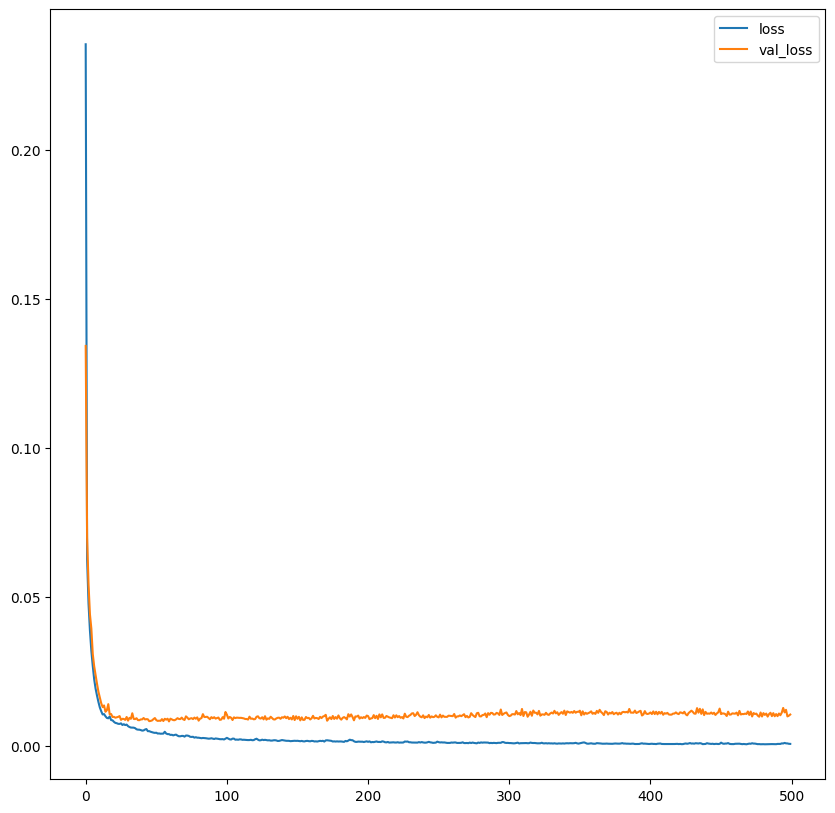

In [ ]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

In [ ]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
403,0.278694,0.000,0.646628,0.0,0.633745,0.342594,0.958805,0.052124,1.000000,0.914122,0.808511,1.000000,0.497792
163,0.017002,0.000,0.700880,1.0,0.452675,0.922399,0.937178,0.093881,0.173913,0.412214,0.223404,0.978693,0.043874
147,0.026552,0.000,0.700880,0.0,1.000000,0.261544,0.955716,0.030118,0.173913,0.412214,0.223404,0.986913,0.767108
12,0.000983,0.125,0.271628,0.0,0.286008,0.446062,0.371782,0.392956,0.173913,0.236641,0.276596,0.983862,0.385762
482,0.064346,0.000,0.646628,0.0,0.302469,0.670627,0.763131,0.207422,1.000000,0.914122,0.808511,0.995915,0.145695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.013682,0.000,0.700880,0.0,0.452675,0.648017,0.973223,0.067992,0.173913,0.412214,0.223404,0.915603,0.078918
359,0.047825,0.000,0.646628,0.0,0.792181,0.488791,0.807415,0.125444,1.000000,0.914122,0.808511,0.984467,0.301876
313,0.002957,0.000,0.346041,0.0,0.327160,0.518299,0.822863,0.193982,0.130435,0.223282,0.617021,0.991149,0.170254
69,0.001369,0.125,0.205645,0.0,0.049383,0.445296,0.309990,0.488174,0.130435,0.301527,0.670213,1.000000,0.194812


In [ ]:
y_pred = b_model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[ 0.07699686],
       [ 0.75408816],
       [ 0.16379932],
       [ 0.325158  ],
       [ 0.60150653],
       [ 0.37545067],
       [ 0.32709473],
       [ 0.23596263],
       [ 0.35326064],
       [ 0.5161535 ],
       [ 0.38814762],
       [ 0.3479212 ],
       [ 0.61354893],
       [ 0.36541206],
       [ 0.4988581 ],
       [ 0.35826033],
       [ 0.4113034 ],
       [ 0.3256535 ],
       [ 0.5531402 ],
       [ 0.04305346],
       [ 0.10775919],
       [ 1.032528  ],
       [ 0.23572508],
       [ 0.22208124],
       [ 0.3469664 ],
       [ 0.16890892],
       [ 0.09282305],
       [ 0.4124382 ],
       [ 0.27849612],
       [ 0.21691161],
       [ 0.41046536],
       [ 0.32126948],
       [ 0.54534954],
       [ 0.3850355 ],
       [ 0.40408003],
       [ 0.24829906],
       [ 0.42441225],
       [ 0.35052484],
       [ 0.43634146],
       [ 0.4051929 ],
       [ 0.29021394],
       [-0.10767498],
       [ 0.27134046],
       [ 0.39550197],
       [ 0.46236485],
       [ 0

In [ ]:
r2_score(y_test, y_pred)

0.9047782491323223

In [ ]:
l0.get_weights()

[array([[ 9.91524942e-03, -1.90191835e-01, -1.11761019e-01,
         -1.62444457e-01,  3.60632427e-02, -2.66144991e-01,
         -2.43087620e-01,  1.83219668e-02,  3.50876600e-01,
         -2.15158761e-01,  3.32587183e-01,  1.47411644e-01,
         -1.04172021e-01, -2.11191297e-01,  3.18522424e-01,
          1.14060767e-01, -2.03641027e-01, -2.60746807e-01,
          1.11821853e-01,  4.19998467e-01, -5.45564927e-02,
         -2.15931863e-01,  2.45054632e-01, -1.25596553e-01,
         -3.71170207e-03, -1.23590961e-01,  1.52757540e-01,
          2.10782126e-01, -1.81488395e-01, -2.75980771e-01,
         -2.55336523e-01, -2.62268931e-01,  3.33569646e-01,
         -3.65509301e-01,  6.90985918e-02,  5.73541522e-02,
          1.58601090e-01,  2.50438362e-01,  2.30342880e-01,
         -1.23043219e-02,  2.64986008e-01,  1.85185075e-01,
         -1.74721673e-01,  2.69574989e-02,  1.33538425e-01,
         -1.24338388e-01, -3.63190532e-01,  6.26377821e-01,
          2.36103326e-01,  2.08791733e-0

# Sesión 7

## Clasificador Naive Bayes

Este modelo utiliza el Teorema Bayes para encontrar qué tan probable es tener uno o utro resultado con base en cada una de las variables que tenemos.

1. Sirve muy bien cuando tenemos datasets pequeños (< 10,000)
2. Funcionan bastante bien con datos de alta dimensionalidad, es decir, cuando tenemos más variables que muestras.
3. Dado el punto 2, funciona bastante para tareas de clasificación de texto.
4. Es bastante bueno para aplicaciones en tiempo real, porque es extremadamente rápido.
5. Es muy buen modelo base, que quiere decir que es una buena idea entrenarlo primero para después tener un punto base de comparación cuando entrenemos otros modelos.
6. También es bastante bueno para hacer clasificación multiclase.
7. Puede funcionar con relaciones no lineales, pero sobre todo es muy bueno para relaciones lineales.

> Importante! Este modelo asume que no hay relaciones de dependencia entre las variables independientes.

In [ ]:
from sklearn.metrics import confusion_matrix

def calcular_exactitud(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def calcular_sensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcular_especificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar_modelo(y_test, y_pred):
  matrix = confusion_matrix(y_test, y_pred)
  (TN, FP, FN, TP) = matrix.ravel()

  print(f"Exactitud: {calcular_precision(TP, TN, FP, FN)}")
  print(f"Sensibilidad: {calcular_sensibilidad(TP, TN, FP, FN)}")
  print(f"Especificidad: {calcular_especificidad(TP, TN, FP, FN)}")

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bedu/Datasets_ADD/Remoto breast_cancer_wisconsin.csv', index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df = df.drop(columns='Unnamed: 32')

In [ ]:
df['diagnosis'] = df['diagnosis'].astype('category').cat.codes

In [ ]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']

### ¿Cómo elijo el tipo de Naives Bayes más apropiado?

- Gaussian: Asume que tenemos variables numéricas continuas. Funciona mejor cuando las variables tienen una distribución Gaussiana.

- Bernoulli: Asume que las variables tienen una distribución de Bernoulli. Esto quiere decir que nuestras variables son categóricas binarias.

- Multinomial: Asume un dataset donde tenemos la probabilidad de cada una de las variables a través de múltiples intentos. Un ejemplo muy sencillo sería si tenemos un dado y lo tiramos 10 veces. Cada muestra sería un dado tirado y cada variable representaría cuál de las caras salió. Podría ser, por ejemplo, el conteo de n-grams en un texto.

- Categorical: Asume que cada variable es una variable categórica.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

<ipython-input-10-6792e6d543e4>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X.hist(bins=100, ax=ax)


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

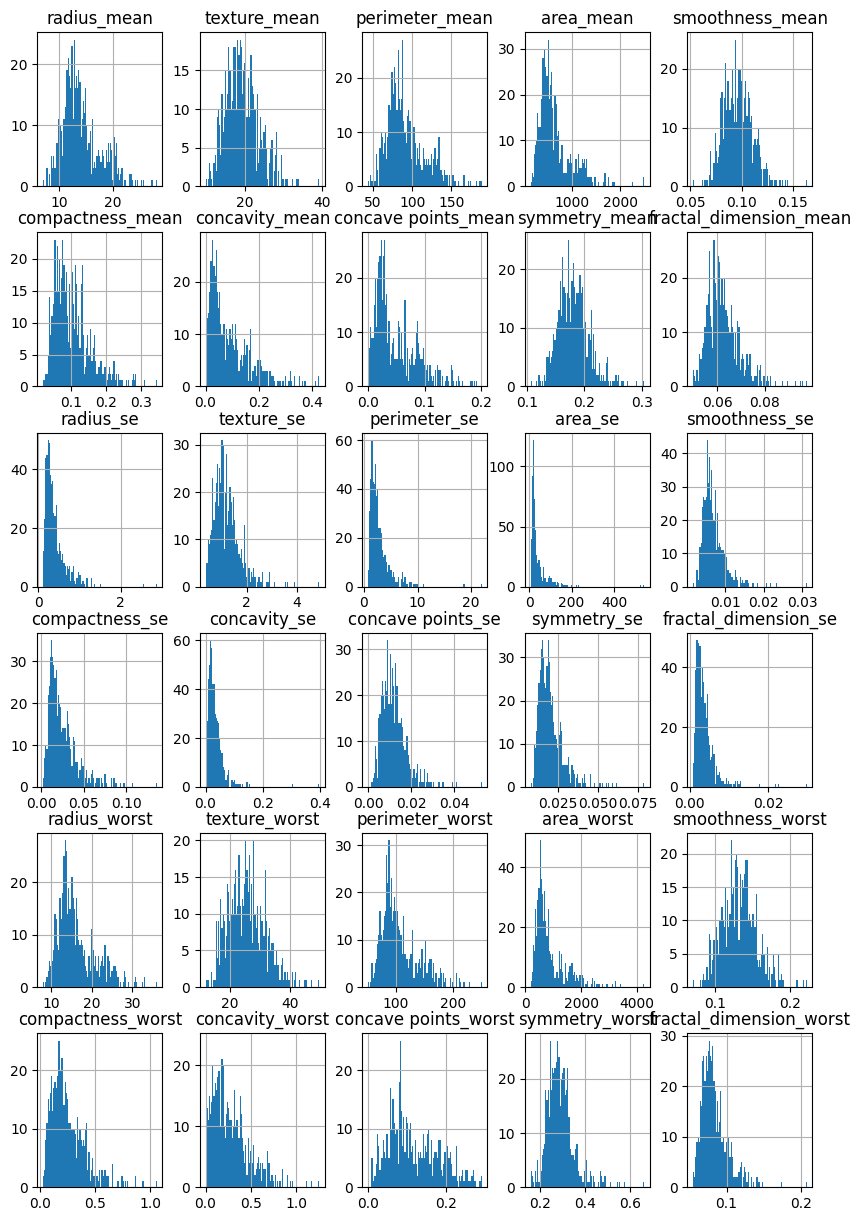

In [ ]:
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot()
X.hist(bins=100, ax=ax)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred = gaussian_nb.predict(X_test)

In [ ]:
evaluar_modelo(y_test, y_pred)

Exactitud: 90.64327485380117
Sensibilidad: 81.42857142857143
Especificidad: 97.02970297029702


In [ ]:
import numpy as np

In [ ]:
X_log = np.log(X + 0.0001)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.3)

In [ ]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred = gaussian_nb.predict(X_test)
evaluar_modelo(y_test, y_pred)

Exactitud: 94.73684210526315
Sensibilidad: 92.1875
Especificidad: 96.26168224299066


## Random Forests

- Funciona bastante bien cuando tenemos relaciones complejas entre las variables. A diferencia de Naive Bayes, no importa si hay correlaciones entre las variables independientes.
- Funciona bien cuando tenemos relaciones no-lineales.
- Sirve bastante para hacer selección de variables. Cuando tenemos un número muy grande de variables, y no tenemos mucha claridad de cuáles tienen una correlación con la dependiente y cuáles no, Random Forests es muy útil porque elimina automáticamente las variables que no tienen correlación con la dependiente.
- Es bastante robusto al ruido, porque tenemos muchos árboles de decisión donde cada árbol es ligeramente distinto. Esto quiere decir que si hay ruido en nuestro dataset, se diluye.
- No requiere de escalamiento en las variables.

In [ ]:
 from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [ ]:
evaluar_modelo(y_pred, y_test)

Exactitud: 95.90643274853801
Sensibilidad: 96.72131147540983
Especificidad: 95.45454545454545


## SVM (Support Vector Machine)

- Cuando tenemos datos con una dimensionalidad muy alta
- Podemos manejar tanto relaciones lineales como relaciones no-lineales
- Es muy bueno para datasets de tamaño pequeño y mediano
- Es muy robusto en contra del overfitting
- Maneja bien las relaciones complejas entre variables independientes

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Kernel puede ser linear, poly, o rbf (aumentar una dimension para encontrar el mejor hiperplano)

svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
evaluar_modelo(y_pred, y_test)

Exactitud: 92.39766081871345
Sensibilidad: 98.11320754716981
Especificidad: 89.83050847457628


## Redes Neuronales para Clasificación Binaria

- Datasets muy grandes
- Muchísimas variables
- Patrones complejos o patrones jerárquicos entre las variables
- Problemas no-lineales
- Cuando por alguna razón es muy difícil o costoso hacer ingeniería de variables, la mejor apuesta es utilizar una red neuronal (obviamente sólo si tenemos suficientes datos)

In [ ]:
import tensorflow as tf

In [ ]:
l0 = tf.keras.layers.Dense(units=8, input_shape=[X_train.shape[1]], activation='sigmoid')
l1 = tf.keras.layers.Dense(units=16, activation='relu')
l2 = tf.keras.layers.Dense(units=1, activation='sigmoid')

In [ ]:
model = tf.keras.Sequential([l0, l1, l2])

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.001), metrics=["Accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, verbose=True, validation_split=0.1)

Epoch 1/1000
12/12 [==============================] - 3s 33ms/step - loss: 0.7140 - Accuracy: 0.3128 - val_loss: 0.6923 - val_Accuracy: 0.5500
Epoch 2/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.6788 - Accuracy: 0.6704 - val_loss: 0.6652 - val_Accuracy: 0.7000
Epoch 3/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.6509 - Accuracy: 0.7291 - val_loss: 0.6319 - val_Accuracy: 0.7500
Epoch 4/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.6089 - Accuracy: 0.7374 - val_loss: 0.5842 - val_Accuracy: 0.7500
Epoch 5/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.5629 - Accuracy: 0.8045 - val_loss: 0.5486 - val_Accuracy: 0.7750
Epoch 6/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.5303 - Accuracy: 0.7877 - val_loss: 0.5200 - val_Accuracy: 0.7750
Epoch 7/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.4973 - Accuracy: 0.8603 - val_loss: 0.4946 - val_Accuracy: 0.8500
Epoch

In [ ]:
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [ ]:
y_pred

In [ ]:
y_pred_01 = []

for num in y_pred:
  if num[0] < 0.5:
    y_pred_01.append(0)
  else:
    y_pred_01.append(1)

In [ ]:
evaluar_modelo(y_test, y_pred_01)

Exactitud: 93.56725146198829
Sensibilidad: 92.1875
Especificidad: 94.39252336448598


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bedu/Datasets_ADD/Remoto diabetes-clean.csv', index_col=0)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
for x in num_cols:
  replace_with_thresholds(df,x)

In [ ]:
df['insulin'] = df['insulin'].where((df['insulin'] > 0)).fillna(df.groupby('outcome')["insulin"].transform("mean"))
df['skin_thickness'] = df['skin_thickness'].where((df['skin_thickness'] > 0)).fillna(df.groupby('outcome')["skin_thickness"].transform("mean"))

In [ ]:
df.loc[(df['glucose'] < 150) & (df['glucose'] > 50) & (df["age"] <= 45), "glu_age_cat"] = "normal_young"
df.loc[(df['glucose'] < 150) & (df['glucose'] > 50) & (df["age"] > 45), "glu_age_cat"] = "normal_old"
df.loc[((df['glucose'] > 150) | (df['glucose'] < 50)) & (df["age"] <= 45), "glu_age_cat"] = "not_normal_young"
df.loc[((df['glucose'] > 150) | (df['glucose'] < 50)) & (df["age"] > 45), "glu_age_cat"] = "not_normal_old"

In [ ]:
df.loc[(df['insulin'] < 30), "insulin_level"] = "Low"
df.loc[(df['insulin'] >= 30) & (df['insulin'] <= 120), "insulin_level"] = "Normal"
df.loc[(df['insulin'] >120), "insulin_level"] = "High"

In [ ]:
df.loc[(df['glucose'] < 50), "glucose_level"] = "Low"
df.loc[(df['glucose'] >= 50) & (df['glucose'] <= 140), "insulin_level"] = "Normal"
df.loc[(df['glucose'] >140), "glucose_level"] = "High"

In [ ]:
df.loc[((df['insulin'] >= 50) & (df['insulin'] <= 140)) & 
       ((df['bmi'] >= 25) & (df['bmi'] <= 36)) & 
       ((df['glucose'] >= 50) & (df['glucose'] <= 150)) &
       ((df['skin_thickness'] >= 20) & (df['skin_thickness'] <= 32))
       , "life_level"] = "Not_Risk"
df['life_level'].fillna('At_Risk',inplace = True)

In [ ]:
df['new_bmi_range'] = pd.cut(x=df['bmi'], bins=[-1, 18.5, 24.9, 29.9, 100],
                                        labels=["underweight", "healty", "overweight", "obese"])

In [ ]:
df['new_bloodpressure'] = pd.cut(x=df['blood_pressure'], bins=[-1, 79, 89, 123],
                                            labels=["normal", "hs1", "hs2"])

In [ ]:
df[cat_cols] = df[cat_cols].astype('category')

df_dummy = pd.get_dummies(df,drop_first = True)
df_dummy.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome_1,glu_age_cat_normal_young,...,glu_age_cat_not_normal_young,insulin_level_Low,insulin_level_Normal,glucose_level_Low,life_level_Not_Risk,new_bmi_range_healty,new_bmi_range_overweight,new_bmi_range_obese,new_bloodpressure_hs1,new_bloodpressure_hs2
0,6.0,148.0,72,35.000000,89.583489,33.6,0.627,50.0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,1.0,85.0,66,29.000000,65.113750,26.6,0.351,31.0,0,1,...,0,0,1,0,1,0,1,0,0,0
2,8.0,183.0,64,22.093284,89.583489,23.3,0.672,32.0,1,0,...,1,0,1,0,0,1,0,0,0,0
3,1.0,89.0,66,23.000000,94.000000,28.1,0.167,21.0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0.0,137.0,40,35.000000,168.000000,43.1,1.200,33.0,1,1,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_scaled = StandardScaler().fit_transform(df_dummy[num_cols])
df_dummy[num_cols] = pd.DataFrame(X_scaled, columns=df_dummy[num_cols].columns)

In [ ]:
y = df["outcome"]
X = df_dummy.drop('outcome_1',axis = 1)

In [ ]:
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X.shape

(768, 20)

In [ ]:
l0 = tf.keras.layers.Dense(units=32, input_shape=[X_train.shape[1]], activation='relu')
l1 = tf.keras.layers.Dense(units=16, activation='relu')
l2 = tf.keras.layers.Dense(units=1, activation='sigmoid')

model10 = tf.keras.Sequential([l0, l1, l2])
model10.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.001), metrics=["Accuracy"])

In [ ]:
history = model10.fit(X_train, y_train, epochs=50, batch_size=32, verbose=True, validation_split=0.1)

Epoch 1/50
16/16 [==============================] - 1s 12ms/step - loss: 0.7187 - Accuracy: 0.4203 - val_loss: 0.6857 - val_Accuracy: 0.5556
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6291 - Accuracy: 0.7039 - val_loss: 0.6199 - val_Accuracy: 0.6667
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5713 - Accuracy: 0.7391 - val_loss: 0.5733 - val_Accuracy: 0.7222
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5287 - Accuracy: 0.7536 - val_loss: 0.5451 - val_Accuracy: 0.7037
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4993 - Accuracy: 0.7723 - val_loss: 0.5269 - val_Accuracy: 0.7407
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4798 - Accuracy: 0.7785 - val_loss: 0.5134 - val_Accuracy: 0.7593
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4660 - Accuracy: 0.7826 - val_loss: 0.5057 - val_Accuracy: 0.7407
Epoch 8/50
16/16 [=

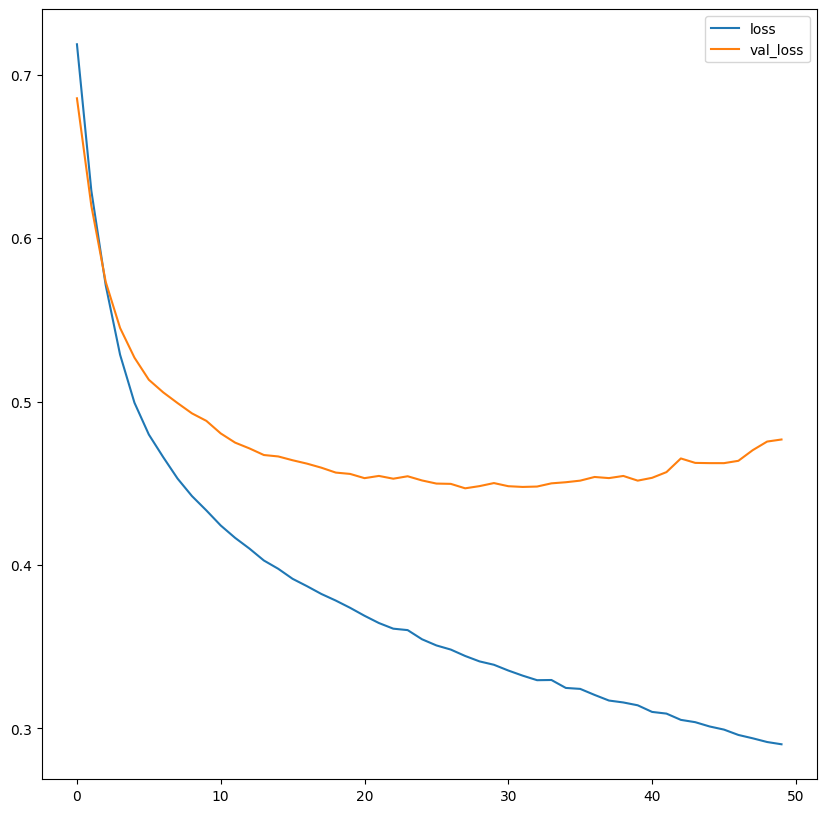

In [ ]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.legend(loc="upper right");

In [ ]:
y_pred = model10.predict(X_test)

y_pred_01 = []

for num in y_pred:
  if num[0] < 0.5:
    y_pred_01.append(0)
  else:
    y_pred_01.append(1)

evaluar_modelo(y_test, y_pred_01)

8/8 [==============================] - 0s 2ms/step
Exactitud: 78.35497835497836
Sensibilidad: 71.05263157894737
Especificidad: 81.93548387096774


# Sesión 8

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
image = cv2.imread('perro.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
image.shape

(700, 1200, 3)

In [ ]:
image[:, :, 0]

array([[159, 159, 159, ..., 188, 189, 189],
       [158, 157, 157, ..., 188, 189, 189],
       [153, 153, 153, ..., 188, 189, 189],
       ...,
       [250, 250, 249, ..., 250, 252, 250],
       [246, 245, 245, ..., 254, 255, 254],
       [243, 242, 242, ..., 255, 255, 255]], dtype=uint8)

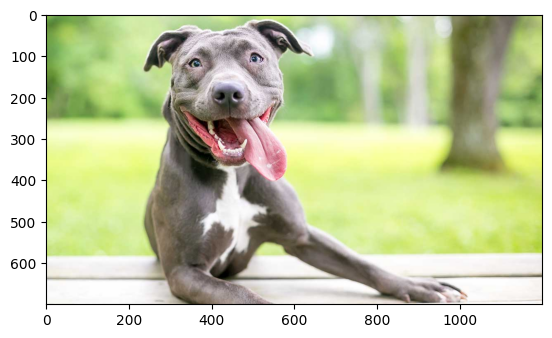

In [ ]:
plt.imshow(image);

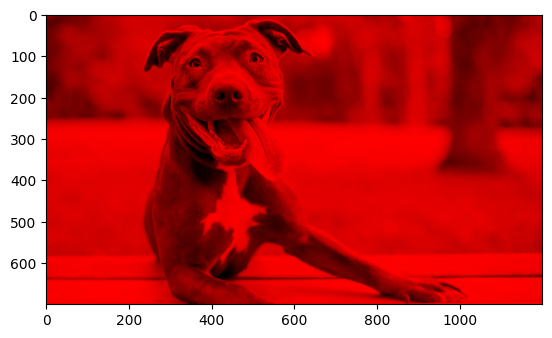

In [ ]:
canal_rojo = image[:, :, 0]
canal_dummy = np.zeros_like(canal_rojo)
imagen_rojo = np.dstack((canal_rojo, canal_dummy, canal_dummy))
plt.imshow(imagen_rojo)